In [1]:
# Task 6: K-Nearest Neighbors (KNN) Classification

# ✅ Section 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap


In [3]:
# ✅ Upload your Iris.csv file manually
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [4]:
# ✅ Section 2: Load Dataset (Using Your Iris.csv)
df = pd.read_csv('/content/Iris.csv')  # Update path if needed for your Colab

# Drop Id column if exists
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# ✅ Section 3: Feature Selection and Target Encoding
X = df.iloc[:, :-1].values  # First 4 columns (features)
y = df.iloc[:, -1].values   # Last column (target - species)

# Convert target labels to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [6]:
# ✅ Section 4: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# ✅ Section 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [8]:
# ✅ Section 6: Train KNN Model with K=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [9]:
# ✅ Section 7: Model Prediction
y_pred = knn.predict(X_test)

print("Predictions:", y_pred)
print("Actual Labels:", y_test)


Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Actual Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [10]:
# ✅ Section 8: Accuracy, Confusion Matrix, Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



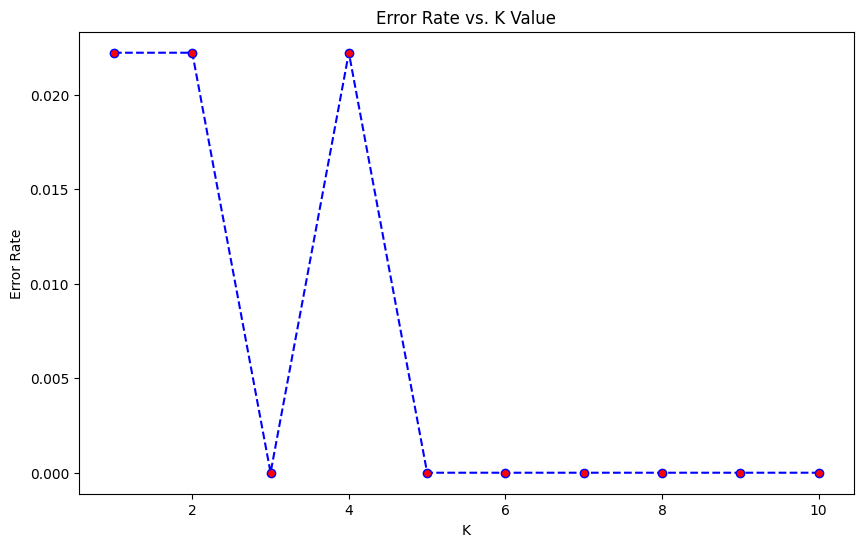

In [11]:
# ✅ Section 9: Experiment with Different K Values (1 to 10)
error = []
k_range = range(1, 11)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error.append(1 - accuracy_score(y_test, pred_k))

# Plot Error Rate vs K
plt.figure(figsize=(10,6))
plt.plot(k_range, error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


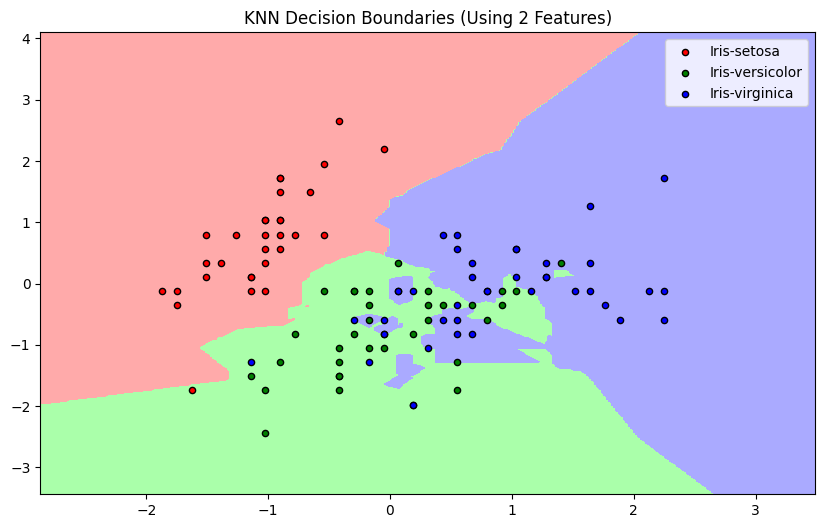

In [12]:
# ✅ Section 10: Decision Boundary Visualization (Using 2 Features for Simplicity)

X_vis = X_scaled[:, :2]  # Using first 2 features (SepalLengthCm, SepalWidthCm)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

# Create Meshgrid
h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
for i, color in zip(range(3), cmap_bold):
    idx = np.where(y_train_vis == i)
    plt.scatter(X_train_vis[idx, 0], X_train_vis[idx, 1], c=color, label=le.classes_[i], edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Boundaries (Using 2 Features)")
plt.legend()
plt.show()
